In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as stm

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import AdaBoostRegressor
from tsfresh.utilities.dataframe_functions import impute

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('Desktop/TJ_Dataset.csv', header=0)

data = data.replace(['^Albumin .*$'], ['Albumin '], regex=True)
data = data.replace(['^Alkaline Phosphatase .*$'], ['Alkaline Phosphatase '], regex=True)
data = data.replace(['^Alpha Feto\- Protein.*$'], ['Alpha Feto- Protein'], regex=True)
data = data.replace(['^Basophils.*$'], ['Basophils'], regex=True)
data = data.replace(['^Calcium .*$'], ['Calcium '], regex=True)
data = data.replace(['^Carcino\-embryonic Antigen.*$'], ['Carcino-embryonic Antigen'], regex=True)
data = data.replace(['^Chloride .*$'], ['Chloride '], regex=True)
data = data.replace(['^Creatinine.*$'], ['Creatinine'], regex=True)
data = data.replace(['^Direct Bilirubin  .*$'], ['Direct Bilirubin  '], regex=True)
data = data.replace(['^Eosinophils.*$'], ['Eosinophils'], regex=True)
data = data.replace(['^Gamma Glutamyltransferase .*$'], ['Gamma Glutamyltransferase '], regex=True)
data = data.replace(['^Globulin .*$'], ['Globulin '], regex=True)
data = data.replace(['^Glucose .*$'], ['Glucose '], regex=True)
data = data.replace(['^HbA1c .*$'], ['HbA1c '], regex=True)
data = data.replace(['^HDL Cholesterol .*$'], ['HDL Cholesterol '], regex=True)
data = data.replace(['^Hepatitis A Antibodies.*$'], ['Hepatitis A Antibodies'], regex=True)
data = data.replace(['^Hepatitis Bs Antibodies.*$'], ['Hepatitis Bs Antibodies'], regex=True)
data = data.replace(['^Inorganic Phosphate .*$'], ['Inorganic Phosphate '], regex=True)
data = data.replace(['^LDL Cholesterol .*$'], ['LDL Cholesterol '], regex=True)
data = data.replace(['^Potassium .*$'], ['Potassium '], regex=True)
data = data.replace(['^Sodium .*$'], ['Sodium '], regex=True)
data = data.replace(['^T.Chol/HDL Cholesterol Ratio .*$'], ['T.Chol/HDL Cholesterol Ratio '], regex=True)
data = data.replace(['^Total Cholesterol .*$'], ['Total Cholesterol '], regex=True)
data = data.replace(['^Total Protein .*$'], ['Total Protein '], regex=True)
data = data.replace(['^Triglycerides .*$'], ['Triglycerides '], regex=True)
data = data.replace(['^Urea .*$'], ['Urea '], regex=True)
data = data.replace(['^Uric Acid .*$'], ['Uric Acid '], regex=True)
data = data.replace(['^Urine PH.*$'], ['Urine PH'], regex=True)
data = data.replace(['^Urine specific gravity.*$'], ['Urine specific gravity'], regex=True)
data = data.replace(['^e GFR.*$'], ['e GFR'], regex=True)

df1 = pd.DataFrame({'CID': data['Clinic ID'],'ID': data['Unique_Identifier'], 'Gender': data['Gender'], 'Nationality': data['Nationality'], 'Test_Date': data['Test_Date'], 'Profile_Name': data['Profile_Name'],'Age': data['Age'],'Score': data['Score'],'Conclusion': data['Conclusion'],'Score_Level': data['Score_Level'],'Name': data['Name'], 'T1': data['Threshold_1'],'T2': data['Threshold_2'],'SI_Conversion': data['SI_Conversion']})
df1.groupby(['CID','ID', 'Gender', 'Age', 'Nationality', 'Test_Date', 'Profile_Name', 'Score_Level', 'Score', 'T1', 'T2', 'SI_Conversion', 'Name']).count().unstack(fill_value=0)

Conclusion  \
Name                                                                                                                              Albumin    
CID ID                               Gender Age Nationality Test_Date Profile_Name Score_Level Score  T1    T2    SI_Conversion              
11  003d25e3fac5a1d2aa4ba502ffb77b5b F      67  SINGAPOREAN 24/05/17  LIFE1        0           0.00   0.0   0.0   1.0000                 0   
                                                                                                      60.0  0.0   1.0000                 0   
                                                                                   1           0.50   0.0   1.0   1.0000                 0   
                                                                                               0.80   0.5   1.3   1.0000                 0   
                                                                                               2.95   4.4   0.0   1.0000                 0   
                                                                                               3.20   2.0   3.7   1.0000                 0   
                                                                                               3.40   2.3   4.7   1.0000                 0   
                                                                                               3.50   3.3   5.1   1.0000                 0   
                                                                                               4.10   2.4   5.7   1.0000                 0   
                                                                                               4.70   3.7   5.1   1.0000                 1   
                                                                                               5.60   0.0   6.0   1.0000                 0   
                                                                                               6.60   4.0   10.0  1.0000                 0   
                                                                                               7.90   6.2   8.2   1.0000                 0   
                                                                                               9.50   8.4   10.4  1.0000                 0   
                                                                                               9.90   2.0   10.0  1.0000                 0   
                                                                                               16.00  8.0   40.0  1.0000                 0   
                                                                                               22.00  22.0  0.0   1.0000                 0   
                                                                                               31.00  27.0  32.0  1.0000                 0   
                                                                                               32.00  10.0  46.0  1.0000                 0   
                                                                                               34.00  32.0  36.0  1.0000                 0   
                                                                                               36.00  15.0  41.0  1.0000                 0   
                                                                                               38.00  38.0  52.0  1.0000                 0   
                                                                                               40.00  36.0  120.0 1.0000                 0   
                                                                                               48.00  40.0  75.0  1.0000                 0   
                                                                                               57.00  38.0  0.0   38.6698                0   
                                                                                               92.00  130.0 0.0   38.6698                0   
          

In [3]:
#df1= df.loc[df['ID'] == '0079e1b73a94ba341f53ca22c6910782']
#df1

In [4]:
df1.loc[df1.Conclusion == 'Desirable', 'Conclusion'] = 'Desirable'
df1.loc[df1.Conclusion != 'Desirable', 'Conclusion'] = 'Not Desirable'

In [5]:
df1.head()

,CID,ID,Gender,Nationality,Test_Date,Profile_Name,Age,Score,Conclusion,Score_Level,Name,T1,T2,SI_Conversion
0,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,16/01/16,"LIFE3 MALE,FPSAP",59,4.4,Desirable,1,Albumin,3.7,5.1,1.0
1,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,10/01/17,LIFE3 MALE,60,4.5,Desirable,1,Albumin,3.7,5.1,1.0
2,11,b2fa0f5835ef1847636d5720fc9f30c9,F,SINGAPOREAN,09/07/16,"LIFE2,HBA1CP",83,4.2,Desirable,1,Albumin,3.7,5.1,1.0
3,11,3f663f8eadfcf405cb7bdb6bf7e14d1a,F,SINGAPOREAN,07/03/17,LIFE1,76,4.0,Desirable,1,Albumin,3.7,5.1,1.0
4,11,f57a87f0625c6b3e44ce79af78b34f60,F,SINGAPOREAN,07/01/16,LIFE2,58,4.3,Desirable,1,Albumin,3.7,5.1,1.0


In [6]:
textReplace = {'Desirable': 0, 'Not Desirable': 1, 'High': 1, 'Not High': 0, 'Low': 1, 'Not Low': 0}
df1.Conclusion =[textReplace[i] for i in df1.Conclusion]

In [7]:
df1['Conclusion'].value_counts()

0    13559
1     9868
Name: Conclusion, dtype: int64

In [8]:
df_code = pd.get_dummies(df1)
df_code

,CID,Age,Score,Conclusion,Score_Level,T1,T2,SI_Conversion,ID_003d25e3fac5a1d2aa4ba502ffb77b5b,ID_0079e1b73a94ba341f53ca22c6910782,...,Name_Urine Micro organism,Name_Urine Nitrite,Name_Urine PH,Name_Urine Protein,Name_Urine Red Blood Cell,Name_Urine Urobilinogen,Name_Urine White Blood cell,Name_Urine specific gravity,Name_Urine white blood cell,Name_e GFR
0,11,59,4.4,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60,4.5,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,83,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,76,4.0,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,58,4.3,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,59,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11,51,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,52,4.1,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,11,44,3.9,0,1,3.7,5.1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,11,68,3.9,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

df_code = pd.get_dummies(df1)
training_features, test_features, \
training_target, test_target, = train_test_split(df_code.drop(['Conclusion'], axis=1),
                                               df_code['Conclusion'],
                                               test_size = .3,
                                               random_state=0)

x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .3,
                                                  random_state=0)
sm = SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
x_train_res = pd.DataFrame(data=x_train_res,columns=x_train.columns )
y_train_res = pd.DataFrame(data=y_train_res,columns=['Conclusion'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(x_train_res))
print("Number of not desirable conclusions in oversampled data",len(y_train_res[y_train_res['Conclusion']==0]))
print("Number of conclusions",len(y_train_res[y_train_res['Conclusion']==1]))
print("Proportion of not desirable conclusions in oversampled data is ",len(y_train_res[y_train_res['Conclusion']==0])/len(x_train_res))
print("Proportion of desirable conclusions in oversampled data is ",len(y_train_res[y_train_res['Conclusion']==1])/len(x_train_res))

length of oversampled data is  13320
Number of not desirable conclusions in oversampled data 6660
Number of conclusions 6660
Proportion of not desirable conclusions in oversampled data is  0.5
Proportion of desirable conclusions in oversampled data is  0.5


In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11478 entries, 18163 to 14558
Columns: 1312 entries, CID to Name_e GFR
dtypes: float64(4), int64(3), uint8(1305)
memory usage: 15.0 MB


In [11]:
x_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 1312 entries, CID to Name_e GFR
dtypes: float64(1312)
memory usage: 133.3 MB


In [12]:
# x_train_res

In [13]:
# y_train_res

In [14]:
x_train_res['Test_Date'] = df1['Test_Date']
x_train_res['ID'] = df1['ID']
x_train_res['Name'] = df1['Name']
x_val['Test_Date'] = df1['Test_Date']
x_val['ID'] = df1['ID']
x_val['Name'] = df1['Name']

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [15]:
x_train1 = x_train_res[['ID', 'Test_Date', 'Name', 'Score']]
x_train1

,ID,Test_Date,Name,Score
0,cb1d683b1f24f3c494138f6cbaf2ce4c,16/01/16,Albumin,16.000000
1,cb1d683b1f24f3c494138f6cbaf2ce4c,10/01/17,Albumin,1.025000
2,b2fa0f5835ef1847636d5720fc9f30c9,09/07/16,Albumin,3.600000
3,3f663f8eadfcf405cb7bdb6bf7e14d1a,07/03/17,Albumin,0.600000
4,f57a87f0625c6b3e44ce79af78b34f60,07/01/16,Albumin,3.400000
5,f57a87f0625c6b3e44ce79af78b34f60,06/06/17,Albumin,27.000000
6,753f1dffc933b14124ba5971430e0dcc,11/01/16,Albumin,32.000000
7,753f1dffc933b14124ba5971430e0dcc,17/12/16,Albumin,3.100000
8,0079e1b73a94ba341f53ca22c6910782,14/01/16,Albumin,79.000000
9,ab3e7156a3d9af00b20c7fd97a318bf6,07/03/17,Albumin,5.500000


In [16]:
x_val1 = x_val[['ID', 'Test_Date', 'Name', 'Score']]
x_val1

,ID,Test_Date,Name,Score
4601,41257a3604cdeedf4620caa2fcc730f3,19/12/16,Eosinophils,1.6000
15904,e8dc06c5ec1551660d3ef752809ad403,01/03/16,Total Protein,7.4000
23365,5a81481218e3dfe38047c527e33521a9,11/05/17,Urine white blood cell,0.0000
11043,8d486cda57a3d601cf36cd58f04537cd,10/09/17,MCHC,34.0000
4611,a64e8ec5fc30ad96804a431b4ac7c9e8,29/12/16,Eosinophils,1.5000
5132,87cc7eae334a556079bb6829f014f5d7,13/02/17,Free T 4,13.3500
13779,bda6e9f6e7d2236235081e25875ba5df,25/03/17,Polymorph,49.8000
8646,4db350132106589d9ee6b74b86104bea,17/06/17,Hepatitis A Antigen,0.0000
9860,98d6cf3411406c68dd2f189993f017c7,08/08/17,LDL Cholesterol,81.0000
22588,00f3ce1c7437a60280aa0268e74550ef,18/09/17,Urine specific gravity,1.0100


In [17]:
x_train1= x_train1.loc[x_train1['Name'] == 'Glucose ']

In [18]:
# x_train1.columns

In [19]:
# df1 = df1[['ID', 'Test_Date', 'Name', 'Score']]
x_train1['Test_Date'] =  pd.to_datetime(x_train1['Test_Date'])


C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# df1 = df1.set_index('Test_Date', drop=False)
# df1.index

In [21]:
# x_val1 = x_val1.set_index('Test_Date')
# x_val1.index

In [22]:
# df1 = df1.groupby(['ID', 'Test_Date', 'Name'])['Score'].mean().reset_index()

In [23]:
# df1 = df1.reset_index()

In [24]:
# df1['t_Date'] = df1['Test_Date']
# df1 = df1.set_index('Test_Date')
# df1.index

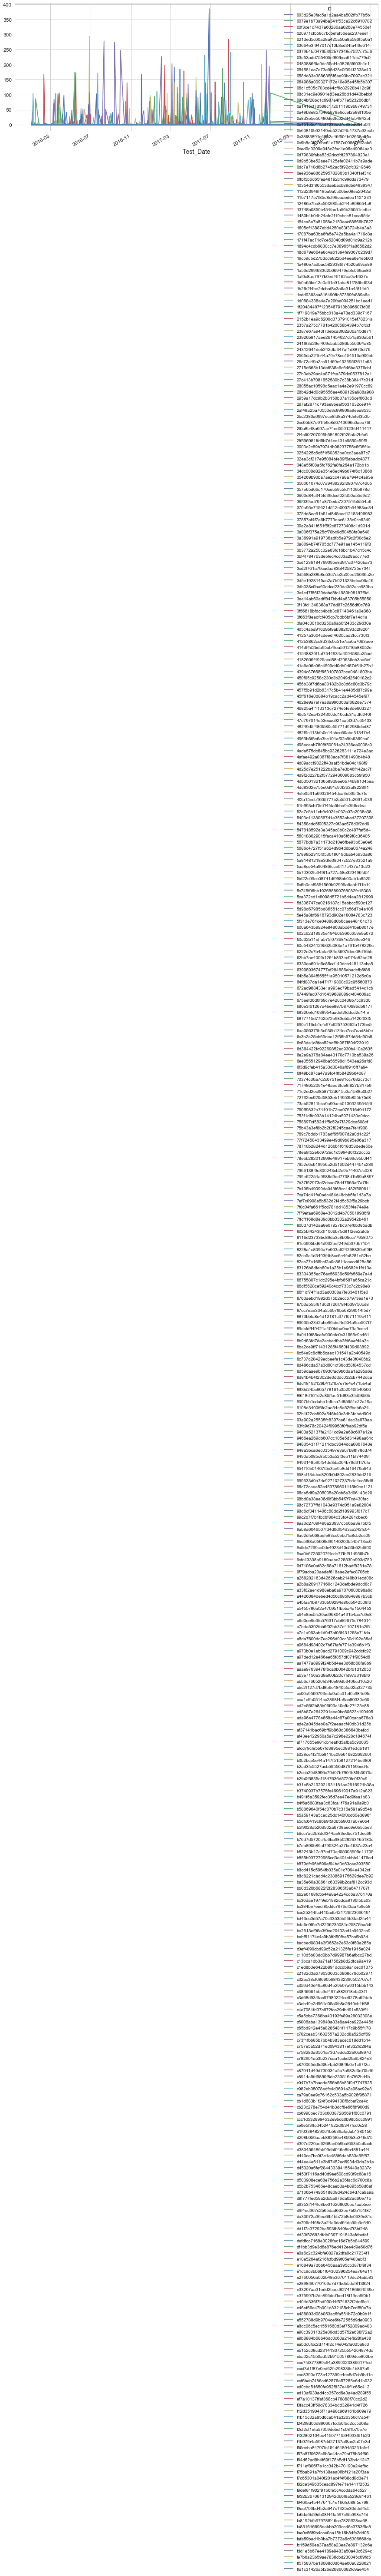

In [25]:
x_train1.groupby(['Test_Date', 'ID']).mean().unstack(fill_value=0)['Score'].plot(figsize=(15, 6))
plt.show()

In [26]:
df_shift, y = make_forecasting_frame(x_train1.groupby(['Test_Date']).mean()["Score"], kind="Score", max_timeshift=20, rolling_direction=1)

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:394: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn("Your time stamps are not uniformly sampled, which makes rolling "


In [27]:
df_shift.head()

,time,value,id,kind
6156,2016-01-03,0.56,2016-01-04,Score
5823,2016-01-03,0.56,2016-01-06,Score
6157,2016-01-04,8.60,2016-01-06,Score
5491,2016-01-03,0.56,2016-01-08,Score
5824,2016-01-04,8.60,2016-01-08,Score


In [28]:
df_shift.shape

(6490, 4)

In [29]:
%%capture
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="value", impute_function=impute,
                     show_warnings=False)

In [30]:
# drop constant features
print(X.shape)
X = X.loc[:, X.apply(pd.Series.nunique) != 1] 
print(X.shape)

(334, 794)
(334, 351)


In [31]:
# Add last value as feature
X["feature_last_value"] = y.shift(1)

In [32]:
# Drop first line
X = X.iloc[1:, ]
y = y.iloc[1: ]

In [33]:
X.head()

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""","value__agg_autocorrelation__f_agg_""median""","value__agg_autocorrelation__f_agg_""var""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""",...,value__symmetry_looking__r_0.8500000000000001,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_0,value__variance,value__variance_larger_than_standard_deviation,feature_last_value
id,,,,,,,,,,,,,,,,,,,,,
2016-01-06,74.2736,8.04,-1.000000,-1.000000,0.000000,95.0,1.0,6.0,76.2,0.081566,...,1.0,1.0,1.0,0.000000,0.0000,0.0,0.0,16.160400,1.0,8.6
2016-01-08,1755.2736,40.44,-0.696050,-0.696050,0.345919,95.0,1.0,6.0,76.2,0.081566,...,1.0,1.0,1.0,14453.903040,0.0000,0.0,0.0,305.532800,1.0,41.0
2016-01-11,12780.2736,104.44,-0.623448,-0.616234,0.505024,95.0,1.0,6.0,76.2,0.081566,...,1.0,1.0,1.0,231723.271520,0.0000,0.0,0.0,1690.404300,1.0,105.0
2016-01-14,12787.0336,206.84,-0.143071,-0.315397,0.191990,95.0,1.0,6.0,76.2,0.081566,...,1.0,1.0,1.0,95883.781013,264.3024,0.0,0.0,1561.878016,1.0,2.6
2016-01-16,12862.7236,212.94,-0.076793,-0.025167,0.180812,95.0,1.0,6.0,105.0,-1.000000,...,1.0,1.0,1.0,64795.784260,222.9762,0.0,0.0,1374.094722,1.0,8.7


In [34]:
from tqdm import tqdm
ada = AdaBoostRegressor(n_estimators=10)
y_pred = [np.NaN] * len(y)

isp = 50   # index of where to start the predictions
assert isp > 0

for i in tqdm(range(isp, len(y))):
    
    ada.fit(X.iloc[:i], y[:i])
    y_pred[i] = ada.predict(X.iloc[i, :].values.reshape((1, -1)))[0]
    
y_pred = pd.Series(data=y_pred, index=y.index)

100%|████████████████████████████████████████| 283/283 [00:32<00:00,  5.26it/s]


In [35]:
ys = pd.concat([y_pred, y], axis = 1).rename(columns = {0: 'pred', 'value': 'true'})

# Convert index to a datetime
ys.index = pd.to_datetime(ys.index)
ys.head()

,pred,true
Test_Date,,
2016-01-06,NaN,41.0
2016-01-08,NaN,105.0
2016-01-11,NaN,2.6
2016-01-14,NaN,8.7
2016-01-16,NaN,43.5


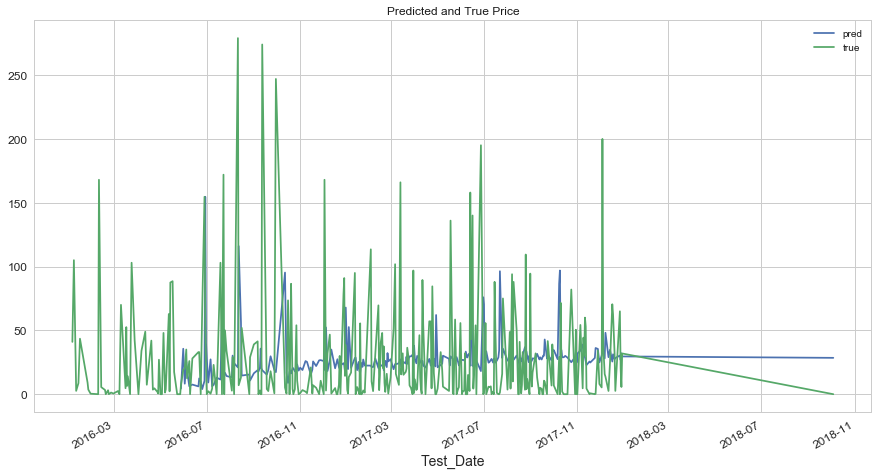

In [36]:
ys.plot(figsize=(15, 8))
plt.title('Predicted and True Price')
plt.show()

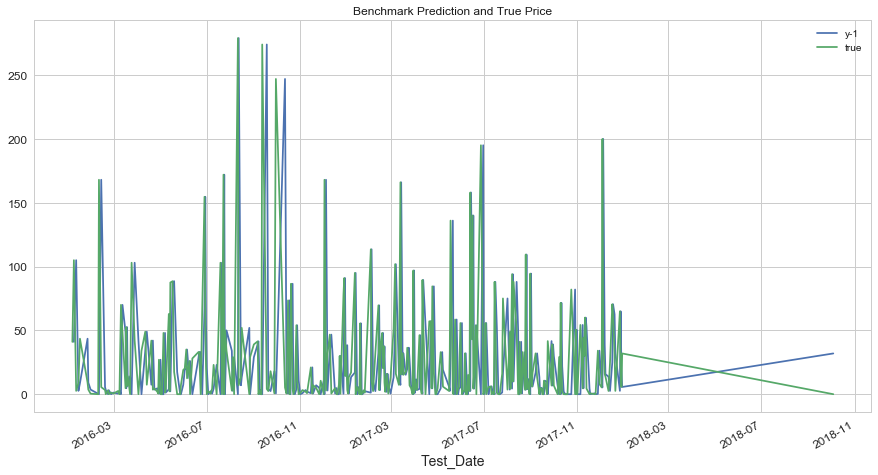

In [37]:
# Create column of previous price
ys['y-1'] = ys['true'].shift(1)
ys[['y-1', 'true']].plot(figsize = (15, 8))
plt.title('Benchmark Prediction and True Price')
plt.show()

In [38]:
print("MAE y-1: \t{}".format(np.mean(np.abs(np.diff(y))[isp-1:] )))
print("MAE ada: \t{}".format(np.mean(np.abs(y_pred - y)[isp:])))

MAE y-1: 	39.75123886925795
MAE ada: 	32.30597285520379


In [39]:
importances = pd.Series(index=X.columns, data=ada.feature_importances_)
importances.sort_values(ascending=False).head(10)

variable
value__fft_coefficient__coeff_3__attr_"imag"                         0.144473
value__autocorrelation__lag_7                                        0.135509
value__autocorrelation__lag_2                                        0.101767
value__autocorrelation__lag_6                                        0.099576
value__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_3__w_2         0.063554
value__index_mass_quantile__q_0.4                                    0.039557
value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"slope"    0.031304
value__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_5        0.031302
value__fft_aggregated__aggtype_"centroid"                            0.026292
value__autocorrelation__lag_1                                        0.023796
dtype: float64